<font color='#EE2FEB'><h1>CONTANTS</h1></font>

-  Introduction.
-  Logical Computations with Neurons.
-  The Perceptron.
-  Multi-Layer Perceptron.
-  Backpropagation.
-  Activation Functions.
- Practical.

    1. Building Logical Computations with Neurons The Perceptron.
    2. Building an Image Calssifier Using the Sequential API.
    3. Building Regression MLPs Using the Sequential API.
    4. Building Complex Models Using the Functional.
    5. Building Dynamic Models Using the Subclassing API 
    6. Saving and Restoring a Model Using Callbacks.
    7. Using callbacks during Traning.
    8. Visualizing Using TensorBoard.
    9. Hyperparameters tuning.

- Exercise solutions.



## <font color='#169DE3'>Introduction.</font> 

--- 
This notebook contains summary of ***Hands-on ML with Scikit-Learn, Keras & TF by Aurelien Geron*** and all the sample code and solutions to the exercises in chapter 10. 

### Why using Deep Learning ? 
- There is now a **huge quantity** of data available to train  neural networks, and ANNs frequently outperform  other ML techniques on very large and complex problems.
- The increase in computing power.
- The training algorithms have been slightly improved. these relatively small tweaks have a huge positive impact.



<font color='#169DE3'><h2> Logical Computations with Neurons.</h2></font>


---

The artificial neuron simply activates its out‐ put when more than a certain number of its inputs are active. 

<img src='https://static.packt-cdn.com/products/9781788997454/graphics/d99451a9-80e4-46ee-8848-46503dfa8461.png'  width="600" height="**300**"/>

<font color = '#E38916'><h3>ANNs performing simple logical computations</h3></font>




## <font color='#169DE3'>The Perceptron.</font>

---


The Perceptron is one of the simplest ANN architectures. It is based on a slightly different artificial neuron called a **linear threshold unit (LTU)**: the inputs and output  are now numbers (instead of binary on/off values) and each input connection is associated with a weight. The LTU computes a weighted sum of its inputs `(z = w1 x1 + w2 x2 + ⋯ + wn  xn  = wT · x)`, then applies a step function to that sum and outputs the result: 
`hw(x) = step (z) = step (wT ·x)`.

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png'  width="600" height="300"/>

<font color = '#E38916'><h3>Linear threshold unit</h3></font>

The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead. A single LTU can be used for simple linear binary classification.

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/eq_1.png'  width="600" height="75" />

<font color = '#E38916'><h3>Common step functions used in Perceptrons</h3></font>


These connections are often represented using special pass‐ through neurons called input neurons: they just output whatever input they are fed. Moreover, an extra bias feature is generally added (x0  = 1). 

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1005.png' width="600" height="300" />

<font color = '#E38916'><h3>Perceptron diagram</h3></font>

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/eq_2.png' width="400" height="50"/>

<font color = '#E38916'><h3>Perceptron learning rule (weight update)</h3></font>

    * w (i, j) is the connection weight between the ith  input neuron and the jth output neu‐
    ron.
    * x(i) is the ith input value of the current training instance.
    * y(j) is the output of the jth output neuron for the current training instance.
    * y(j) is the target output of the jth output neuron for the current training instance.
    * η is the learning rate.
---

> In general when the data are linearly separable, there is an infinity of hyperplanes that can separate them.

> Scikit-Learn provides a **`Perceptron`** class that implements a single LTU network.

> Note that Scikit-Learn’s `Perceptron` class is equivalent to using an `SGDClassifier` with the following hyperparameters: 
  - loss="perceptron"
  - learning_rate="constant"
  - eta0=1 (the learning rate)
  - penalty=None (no regularization).

> Note that contrary to **Logistic Regression classifiers**, `Perceptrons` do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

> The serious weaknesses of Perceptrons is that they are incapable of solving some trivial problems *(e.g., the Exclusive OR (XOR)* classification problem. 

> Some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. 
> The resulting ANN is called a Multi-Layer Perceptron (MLP). In particular, an MLP can solve the XOR problem, 

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1006.png' width="600" height="300"/>


<font color='#E38916'><h3>XOR classification problem and an MLP that solves it </h3></font>






## <font color='#169DE3'>Multi-Layer Perceptron.</font> 

---

- An MLP is composed of one **input layer**, one or more layers of LTUs, called **hidden  layers**, and  one  final  layer  of  LTUs called the  **output  layer**.
- Every layer except the output layer includes a bias neuron and is fully connected to the next layer.
- When an ANN has two or more hidden layers, it is called a deep neural network (DNN).


<img src='https://www.oreilly.com/library/view/predictive-analytics-with/9781788398923/graphics/B08056_07_07.jpg' align="center" width="500" height="300"/>

<font color='#E38916'><h3>Multi-Layer Perceptron.</h3></font>


## <font color='#169DE3'> Backpropagation. </font> 

---

Today we would describe it as Gradient Descent using reverse-mode autodiff.*(Gradient Descent was introduced in Chapter 4, and autodiff was discussed in Chapter 9)*.

- For each training instance the backpropagation algorithm: 
   1. Makes a prediction (forward pass).
   2. Measures the error.
   3. Goes through each layer in reverse to measure the error contribution from each connection.
   4. Slightly tweaks the connection weights to reduce the error.
   



## <font color='#169DE3'> Activation Functions. </font> 

---

they replaced the step function because it contains only flat segments, so there is no gradient to work with *(Gradient Descent cannot move on a flat surface)*.
 
- The step function with the logistic function.
`σ(z) = 1 / (1 + exp(–z))`

- The hyperbolic tangent function tanh 
`tanh(z) = 2σ(2z) – 1`
    * S-shaped, continuous, and differentiable.
    * Output value ranges from –1 to 1.
    * It tends to make each layer’s output more or less normalized(i.e., cen‐ tered around 0).


- The ReLU function `ReLU(z) = max (0, z)`.
   * Continuous but unfortunately not differentiable at `z =0`
   * Fast.
   * helps reduce some issues during Gradient Descent.

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1008.png' width = '1000' height = '250' />
<h3 align="center">

<font color='#E38916'><h3>Activation functions and their derivatives</h3></font>

- The softmax function.
   * When the classes are exclusive (e.g., classes 0 through 9 for digit image classification).
   * The output  of each neuron  corresponds to the estimated probability of the corre‐ sponding class.

> ### This  architecture  is an  example of a feedforward neural network (FNN).

<img src='https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1009.png' width = '600' height = '400' />

<font color='#E38916'><h3>
A modern MLP (including ReLU and softmax) for classification.</h3></font>



## 0. Setup
Preparing the environment (outside the book)

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras
assert keras.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(2021)
tf.random.set_seed(2021)

# To plot pretty figures
''' The style package adds support for easy-to-switch plotting 
    "styles" with the same parameters '''

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    # Adjust the padding between and around subplots.
    if tight_layout:
        plt.tight_layout()
    # The available output formats depend on the backend being used.
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)

plt.axis([-5, 5, -1.2, 1.2])
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

Numerically estimate the differential of a continuous function are
so-called finite difference methods.
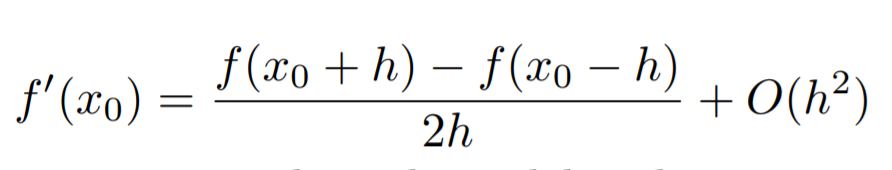)

In [ ]:
def heaviside(z):                                # step function
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

In [ ]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)                         #contour and contourf draw contour lines and filled contours
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## <font color='#169DE3'>Practical</font>


---



### <font color = '#1BC397'> 1. Building Logical Computations with Neurons The Perceptron.</font>

#### (1) Load data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]                  # petal length, petal width
y = (iris.target == 0).astype(np.int)     # Iris Setosa?

In [ ]:
y

In [ ]:
Perceptron_model = Perceptron(random_state=2021)
Perceptron_model.fit(X, y)
y_pred = Perceptron_model.predict([[2, 0.5]])

In [ ]:
y_pred

#### (2) Draw the best fit line 

In [ ]:
# coef_ : Weights assigned to the features (W).
# intercept_ : Constants in decision function (b).

W = -Perceptron_model.coef_[0][0] / Perceptron_model.coef_[0][1]
b = -Perceptron_model.intercept_ / Perceptron_model.coef_[0][1]

axes = [0, 5, 0, 2]

# meshgrid : Return coordinate matrices from coordinate vectors.
x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
                     np.linspace(axes[2], axes[3], 200).reshape(-1, 1))

# C_ : Translates slice objects to concatenation along the second axis (col).
# ravel : functions returns contiguous flattened array.
X_new = np.c_[x0.ravel(), x1.ravel()]

# Make a prediction
y_predict = Perceptron_model.predict(X_new)
out = y_predict.reshape(x0.shape)

#### (3) plotting

In [ ]:
# plotting
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
# fitting the line
plt.plot([axes[0], axes[1]], [W * axes[0] + b, W * axes[1] + b], "k-", linewidth=3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, out, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

### <font color = '#1BC397'> 2. Building an Image Classifier Using the Sequential API.</font>

* we need to load a dataset.
* It has the exact same format as MNIST (70,000 grayscale images of 28×28 pixels each, with 10 classes).
* The images represent fashion items rather than handwritten digits.
* Each class is more diverse and the problem turns out to be significantly more challenging than MNIST. 
   * For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

> #### Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST

#### (1) Load and preparing the **data**

In [ ]:
from tensorflow import keras
print(keras.__version__)

In [ ]:
# load data from keras datasets 
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

> SO : each pixal intensity id represented as a byte ( 0 to 255 )

In [ ]:
# Splitting my data to train and validation. 
# We also scale the pixel intensities down to the 0-1 range (Normalization)
# and convert them to floats, by dividing by a float number (255.0) 
X_valid, X_train = X_train[:5000] / 255.0 ,  X_train[5000:] / 255.0 
y_valid, y_train = y_train[:5000] ,  y_train[5000:] 
X_text = X_test / 255.0

In [ ]:
# exploration

print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_valid shape : ', X_valid.shape)
print('y_valid shape : ', y_valid.shape)
print('X_test shape : ' , X_test.shape)
print('y_test shape : ' , y_test.shape)
print('\nX_train data type : ', X_train.dtype)
print('\n y_train[:10] : ', y_train[:10])

In [ ]:
class_names =  ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# plot an image 
plt.imshow(X_train[502], cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
print(y_train[502])
print(class_names[y_train[502]])

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize = (20, 8))

for row in range(n_rows):
  for col in range(n_cols):
    idx = n_cols * row + col
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(X_train[idx], cmap='binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_names[y_train[idx]], fontsize=12)

#plt.subplot_adjust(wspace = 0.2 , hspace = 0.5)
save_fig('fashion_mnist_plot', tight_layout = False)
plt.show()

#### (2) Build my Net

1. Sequential model :
   *  just composed of a single stack of layers, connected sequentially. ***This is called the sequential API.***

2. Flatten layer :
   *  whose role is simply to convert each input image into a 1D array
   * if it receives input data X, it computes X.reshape(-1, 1). 
   * This layer does not have any parameters
   * it is the first layer in the model.
   * this does not include the batch size, only the shape of the instances.
   *  You could add a keras.layers.InputLayer as the first layer, setting shape=[28,28].

3. Dense hidden layer :
  *  With 300 neurons and `ReLU` activation function.
  * Each Dense layer manages its own weight matrix and bais term.
  * Containing all the connection weights between the neurons and their inputs.

4. Dense output layer with 10 neurons (one per class), using the softmax activation function.

> Specifying` activation="relu"` is equivalent to `activation=keras.activations.relu.` [keras activations](https://keras.io/activations/)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
keras.backend.clear_session()
np.random.seed(2021)
tf.random.set_seed(2021)

> Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model

In [ ]:
# model = keras.models.Sequential([
#                                  keras.layers.Flatten(input_shape = (28, 28)),
#                                  keras.layers.Dense(300, activation='relu'),
#                                  keras.layers.Dense(100, activation='relu'),
#                                  keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, 'my_fashion_mnist_model.png', show_shapes = True)

> Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters

In [ ]:
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer(hidden1.name) is hidden1 )

In [ ]:
W, b = hidden1.get_weights()
print(W[:10] , '\n\n', b[:10])
print('\nWeights shape : ', W.shape)
print('\nbaises shape : ', b.shape)

#### (3) Compile my model
Specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation.
1. LOSS
  - `sparse_categorical_crossentropy` loss because we have sparse labels(a target class index, from 0 to 9 in this case).
  - If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `categorical_crossentropy` loss instead.
  - If we were doing binary classification , then we would use the `sigmoid` (logistic) activation function, and we would use the `binary_crossentropy` loss.

  - If you want to convert sparse labels to one-hot vector labels, you can use the `keras.utils.to_categorical()` function.[keras losses](https://keras.io/api/losses/)

2. OPTIMIZER

   - "sgd" simply means that we will train the model using simple Stochastic Gradient Descent (reverse-mode autodiff + Gradient Descent).[keras optimizers](https://keras.io/api/optimizers/)
   

3. METRICS 

  - Finally, since this is a classifier, it’s useful to measure its `accuracy` during training and evaluation.[keras metrics](https://keras.io/api/metrics/)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

# This is equivalent to

# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(),
#               metrics=[keras.metrics.sparse_categorical_accuracy])

#### (4) Train my model
- we simply need to call its `fit() `method We pass it :
   * the input features (X_train).
   * the target classes (y_train).
   * the number of epochs to train *(or else it would default to just 1)*
   
- We also pass a validation set (this is optional): 
  * Keras will measure the loss and the extra metrics on this set at the end of each epoch
  * which is very useful to see how well the model really performs.
  * if the performance on the training set is much better than on the validation set, your model is probably ***overfitting*** the training set.

- The `fit()` method returns a History object containing the training parameters `history.params`.
    * the list of epochs it went through `history.epoch`.
    * most importantly a dictionary `history.history` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set.

In [ ]:
history = model.fit(X_train, y_train, epochs = 30,
                    verbose = 1,
                    validation_data = (X_valid, y_valid))

> ##### Notes After training
- Keras displays the number of instances processed so far, the mean training time per sample, the loss and accuracy, both on the training set and the validation set. 
-  the validation curves are quite close to the training curves, which means that there is not too much ***overfitting***.

> Instead of passing a validation set using the validation_data argument, you could instead set `validation_split` to the ratio of the training set that you want Keras to use for validation (e.g., 0.1).


> You should probably continue training. It’s as simple as calling the `fit() `method again, since Keras just continues training ***where it left off***.

> If you are not satisfied with the performance of your model, you should go back and tune the model’s hyperparameters (epochs, batch_size, number of hidden layers, neourns in each hidden layer)

In [ ]:
print(history.params,'\n')
print(history.epoch,'\n')
print(history.history.keys())

#### (5) Plot the history

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)    # set the vertical range to [0-1]
save_fig('keras_learning_curves')
plt.show()

#### (6) Evaluate my model
- Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. 

- You can easily do this using the `evaluate()` method.

In [ ]:
model.evaluate(X_test, y_test)

#### (7) Test my model

In [ ]:
X_new = X_test[3:8]
y_probality = model.predict(X_new)
print(y_probality, '\n')
y_pred = y_probality.round(2)
print(y_pred, '\n')

In [ ]:
X_new.shape

> If you only care about the class with the highest estimated probability then you can use the `predict_classes()` method instead


In [ ]:
y_pred = model.predict_classes(X_new) 
print(y_pred)
print(np.array(class_names)[y_pred],'\n')

#### (8) Display the prediction of the test set

In [ ]:
plt.figure(figsize = (10,10))

for idx, img in enumerate(X_new):
  plt.subplot(2, (X_new.shape[0]/2) + 1, idx+1 )
  plt.imshow(img, cmap='binary', interpolation = 'nearest')
  plt.axis('off')
  plt.title(class_names[y_test[idx]], fontsize = 12)


### <font color = '#1BC397'> 3. Building a Regression MLP Using the Sequential API. </font>

we will use Scikit-Learn’s `fetch_california_housing()` function to load the data.



#### (1) Load data

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# load data 
housing = fetch_california_housing()
# splitting data to train and test 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
# splitting full train data to train and and validation  
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
# Normalization (standarlization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test  = scaler.fit_transform(X_test)

In [ ]:
np.random.seed(2021)
tf.random.set_seed(2021)

#### (2) Build my Net

It is quite similar to what we did for classification. The main differences are the fact that the output layer has a ***single neuron***.

In [ ]:
model = keras.models.Sequential ([
                                  keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
                                  keras.layers.Dense(1)
])

#### (3) Compile my model 

In [ ]:
learning_rate = 1e-3
n_epochs = 20
model.compile(loss = 'mse',
              optimizer = keras.optimizers.SGD(lr = learning_rate))

#### (4) Train my model

In [ ]:
history= model.fit(X_train, y_train, epochs = n_epochs,
                   validation_data = (X_valid, y_valid))

#### (5) plot the history

In [ ]:
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig('keras_learning_curves_regression_MLP')
plt.show()

#### (6) Evaluate my model

In [ ]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

#### (6) Test my model 

In [ ]:
X_new = X_test[3:8]
y_pred = model.predict(X_new)
print(y_pred)


### <font color = '#1BC397'> 4.Building a Complex Models Using the Functional API (Non-sequential neural network).</font>

It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). 

* In contrast, a regular MLP forces all the data to flow through the full stack of layers.


<font color = '#E38916'><h3>Wide and Deep Neural Network orilly.</h3></font>


> Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [ ]:
np.random.seed(2021)
tf.random.set_seed(2021)

#### (1) Build my Net

1. `Input object:`
  * This is needed because we may have multiple inputs.
2. `Dense layer: `
  * with 30 neurons and using the `ReLU` activation function. notice that we call it like a function. This is why this is called the Functional API. 
  * Note that we are just telling Keras how it should connect the layers together, no actual data is being processed yet.
  * We then create a numbrer of hidden layers
3. `Concatenate layer:`
  * we immediately use it like a function, to concatenate the input and the output of the second hidden layer.
4. `output layer:`
  * with a single neuron and no activation function
   * we call it like a function.
   
5. Lastly, we create a Keras Model, specifying which inputs and outputs to use.



In [ ]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concate = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concate)

model = keras.models.Model(inputs = [input_], outputs = [output])

In [ ]:
model.summary()

#### (2) Compile my model

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

#### (3) Train my model 

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

#### (4) Evaluate my model

In [ ]:
mse_test = model.evaluate(X_test, y_test)

#### (5) Test my model

In [ ]:
X_new = X_test[3:8]
y_pred = model.predict(X_new)
y_pred

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

#### (6) Handling Multiple Inputs Net
<img src = 'https://i2.wp.com/img-blog.csdnimg.cn/20200607073909979.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70' width= '300' height = '300'>

- Now we can compile the model as usual.
- When we call the` fit()` method, instead of passing a single input matrix X_train, we must pass a pair of matrices (**X_train_A, X_train_B**).
- The same is true for **X_valid**, and also for **X_test** and **X_new** when you call `evaluate()` or `predict()`

In [ ]:
input_A = keras.layers.Input(shape=[5],  name="wide_input")
input_B = keras.layers.Input(shape=[6],  name="deep_input") 
hidden1 = keras.layers.Dense(30, activation="relu")(input_B) 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) 
concat = keras.layers.concatenate([input_A, hidden2]) 
output = keras.layers.Dense(1)(concat) 

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] 
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [ ]:
history = model.fit(
    (X_train_A, X_train_B),
    y_train, epochs=20, 
    validation_data=((X_valid_A, X_valid_B),y_valid)
                    )
mse_test = model.evaluate((X_test_A, X_test_B), y_test) 
y_pred = model.predict((X_new_A, X_new_B))
y_pred

What if you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

#### (7) Handling Multiple Outputs – Auxiliary Output for Regularization.

<img src = 'https://i2.wp.com/img-blog.csdnimg.cn/2020060708163455.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70' width = '400' height = '300'>

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

print(y_pred_main , '\n' , y_pred_aux)

### <font color = '#1BC397'> 5. Building a Dynamic Models Using the Subclassing API.</font>

A more imperative programming style. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. it simply subclass the Model class, ***create*** the layers you need in the constructor, and use them to perform the computations you want in the **` call()`** method. 

- This example looks very much like the Functional API, except we ***don't need to create the inputs***, we just use the input argument to the **`call()`** method, and we separate the creation of the layers.

- However, the big difference is that you can do pretty much anything you want in the **`call()`** method: for loops, if statements, low-level TensorFlow operations, your imagination is the limit.

- However, this extra flexibility comes at a cost: your model’s architecture is hidden within the `**call()**` method so:
  * Keras cannot easily inspect it, it cannot **save** or **clone** it, and when you call the `summary()` method. 
  * you only get a list of layers, without any information on how they are connected to each other. 
  
  * Moreover, Keras cannot check types and shapes ahead of time.
  * It is easier to make mistakes. 
  
  **So unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API**


#### (1) Build my model

In [ ]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units = 30,  activation='relu', **kwargs):
    super().__init__(**kwargs)

    self.hidden1 = keras.layers.Dense(units, activation = activation)
    self.hidden2 = keras.layers.Dense(units, activation = activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output  = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return main_output, aux_output

model = WideAndDeepModel(50, activation = 'relu')


#### (2) Compile my model 


In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))


#### (2) Train my model

In [ ]:
history = model.fit((X_train_A, X_train_B),
                    (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

#### (3) Evaluate my model

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [ ]:
y_pred_aux

In [ ]:
y_pred_main


### <font color = '#1BC397'>6. Saving and Restoring a Model Using Callbacks.</font>

Keras will save both the model’s architecture and the value of all the model parameters for every layer (e.g., connection weights and biases), using the ***HDF5*** format. 

> It also saves the optimizer (including its hyperparameters and any state it may have).

> Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models


#### (1) Create my model

In [ ]:
np.random.seed(2021)
tf.random.set_seed(2021)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

#### (2) Save my model

In [ ]:
# save the model in HDF5 formate
model.save("my_keras_model.h5")

In [ ]:
model.save_weights("my_keras_weights.ckpt")

#### (3) Load my model

In [ ]:
#Restore the model
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

#### (4) Make a prediction

In [ ]:
X_new = X_test[:3]
model.predict(X_new)

### <font color = '#1BC397'> 7. Using Callbacks during Training.</font>

[keras callbacks](https://keras.io/callbacks/)
- The **`ModelCheckpoint`** callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch.
    * it will only save your model when its performance on the validation set is the best so far. 
    * This way, you do not need to worry about training for too long and overfitting the training set. simply restore the last model saved after training, and this will be the best model on the validation set.

- The **`EarlyStopping`** callback. 
    * It will interrupt training when it measures no progress on the validation set.
    * It will optionally roll back to the best model. 
    * The number of epochs can be set to a large value since training will stop automatically when there is no more progress



In [ ]:
# build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5" , save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

#### Custom callbacks
If you need extra control, you can easily write your own custom callbacks. For example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting)

* you can implement `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_epoch_begin()`,` on_batch_end()` and `on_batch_end()`. 

* callbacks can also be used during evaluation and predictions. In this case, you should `implement on_test_begin()`,
`on_test_end()`, `on_test_batch_begin()`, or
`on_test_batch_end()` (called by `evaluate()`), or `on_predict_begin()`, `on_pre dict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()` (called by `predict()`).

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
my_callback = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[my_callback])

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

### <font color = '#1BC397'> 8. Visualization Using TensorBoard.</font>

TensorBoard is a great interactive visualization tool that you can use to :
* view the learning curves during training.
* compare learning curves between multiple runs.
* visualize the computation graph.
* analyze training statistics.
* view images generated by your model.
* visualize complex multidimensional data projected down to 3D and automatically clustered for you.

> This tool is installed automatically when you install TensorFlow, so you already have it.

* Each binary data record is called a summary. 
* The TensorBoard server will monitor the log directory.
* it will automatically pick up the changes and update the visualizations.

> It writes to a different subdirectory every time it runs this way will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.



In [ ]:
root_logdir = os.path.join(os.curdir, 'my_logs')

> This function will generate a subdirectory path based on the current date and time, so that it is different at every run. 

> You may want to include extra information in the log directory name, such as hyperparameter

In [ ]:
import time
def get_run_logdir():
  run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
print(run_logdir)

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
hidtory = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid),
                    callbacks=[tensorboard_cb])

> This callback exported the computation graph and many useful statistics: type help(keras.callbacks.TensorBoard) to see all the options.

1. To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory

  ```
  $ tensorboard --logdir=./my_logs --port=6006
  ```

2. You can then open your web browser to [localhost:6006]((http://localhost:6006) and use TensorBoard. 

3. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

4. Alternatively, you can load TensorBoard's Jupyter extension and run it like this:


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

### <font color = '#1BC397'> 7. Hyperparameter Tuning.</font>

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or using K-fold cross-validation). 

For this, one approach is simply use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space.


#### Python libraries you can use to optimize hyperparameters
* [Hyperopt](https://github.com/hyperopt/hyperopt): optimizing over all sorts of complex search spaces (including real values such as the learning rate, or discrete values such as the number of layers).
* [Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt) or [Talos](https://github.com/autonomio/talos): optimizing hyperparameters for **Keras** model.
* [Scikit-Optimize](https://scikit-optimize.github.io/) (skopt): performs Bayesian optimization using an interface similar to Grid SearchCV.
* [Spearmint](https://github.com/JasperSnoek/spearmint): a Bayesian optimization library. 
* [Sklearn-Deap](https://github.com/rsteca/sklearn-deap): based on evolutionary algorithms, also with a `GridSearchCV`-like interface.

In [ ]:
keras.backend.clear_session()
np.random.seed(2021)
tf.random.set_seed(2021)

>The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters.This function creates a simple Sequential model for univariate regression

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  # create a model
  model = keras.models.Sequential()
  # input layer 
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  # hidden layers
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
  # output layer
  model.add(keras.layers.Dense(1))
  # compile the model
  optimizer = keras.optimizers.SGD(lr = learning_rate)
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['accuracy'])

  return model

> The KerasRegressor object is a thin wrapper around the Keras model built using `build_model()`.
  
 * Now we can use this object like a regular Scikit-Learn regressor.

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

> we can train it using its `fit() `method.

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

> Evaluate it using its `score()` method.

In [ ]:
mse_test = keras_reg.score(X_test, y_test)
mse_test

> Note that any extra parameter you pass to the `fit()` method will simply get passed to the underlying Keras model. Also note that the score will be the ***opposite*** of the `MSE` because Scikit-Learn wants scores, not losses. 

> Make predictions using its` predict() `method.

In [ ]:
y_pred = keras_reg.predict(X_test[:3])
y_pred

> We want to train hundreds of variants and see which one performs best on the validation set.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

hparamerters = {
    'n_hidden':[0, 1, 2, 3] , 
    'n_neurons':np.arange(1, 100) ,
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, hparamerters,
                                   n_iter=2, cv=3, verbose=2)


> Note that [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) uses K-fold cross-validation, so it does not use X_valid and y_valid. These are just used for early stopping.

> First run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. However, **this is very time consuming**, and probably not the best use of your time.

In [ ]:
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon.

#### Display best hyperparameters

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

#### Evaluatation

In [ ]:
rnd_search_cv.evaluate(X_test, y_test)

#### Testing

In [ ]:
rnd_search_cv.score (X_test, y_test)



---

---





## <font color='#169DE3'>Exercise solutions</font>
---



### 1 to 9 see appendix A

### 10 - 
Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, use early stopping, plot learning curves using TensorBoard, and so on).


#### (1) Load data

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) =keras.datasets.mnist.load_data() 

In [ ]:
print('X_train_full shape : ',X_train_full.shape)
print('\ny_train_full shape : ',y_train_full.shape)
print('\nX_test shape : ',X_test.shape)
print('\ny_test shape : ',y_test.shape)

Splitting the full training set into a validation and train set 

In [ ]:
X_valid, y_valid = X_train_full[:5000], y_train_full[:5000]
X_train, y_train = X_train_full[5000:], y_train_full[5000:]

Normalization the X sets between [0-1] and convert set to `float32` by dividing by 255.0.

In [ ]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

Display some images from images dataset

In [ ]:
def display_images (n_rows, n_cols, X, y, fontsize):
  plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2) )
  for row in range(n_rows):
    for col in range(n_cols):
      idx = row * n_cols + col
      plt.subplot(n_rows, n_cols, idx + 1) 
      plt.imshow(X[idx], cmap = 'binary', interpolation = 'nearest')
      plt.axis('off')
      plt.title(y[idx], fontsize = fontsize)
  plt.subplots_adjust(wspace = 0.2, hspace=0.4)
  plt.show()


In [ ]:
n_rows = 4
n_cols = 10
fontsize = 12

display_images (n_rows, n_cols, X_train, y_train, fontsize )

In [ ]:
display_images (n_rows, n_cols, X_valid, y_valid, fontsize)

In [ ]:
display_images (n_rows, n_cols, X_test, y_test, fontsize)

#### (2) Create my own callback to handle the learning rate 

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

#### (3) Build my Net

In [ ]:
keras.backend.clear_session()
np.random.seed(2021)
tf.random.set_seed(2021)

In [ ]:
model = keras.models.Sequential([
   keras.layers.Flatten(input_shape = (28, 28)),
   keras.layers.Dense(300, activation = 'relu'), 
   keras.layers.Dense(100, activation = 'relu'),                              
   keras.layers.Dense(10, activation = 'softmax'),                              
])

In [ ]:
model.summary()

#### (4) Compile my model

In [ ]:
start_lr = 1e-3

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(lr = start_lr),
              metrics = ['accuracy'])

my_callback = ExponentialLearningRate(factor = 1.005)

#### (5) Train my model

In [ ]:
epochs = 1

my_history = model.fit(X_train, y_train, verbose = 2,
          validation_data=(X_valid, y_valid),
          callbacks = [my_callback], epochs = epochs
          )

#### (6) plotting the training results
[hlines](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hlines.html)

In [ ]:
plt.plot(my_callback.rates, my_callback.losses)
plt.gca().set_xscale('log')

plt.hlines(min(my_callback.losses), 
           min(my_callback.rates), 
           max(my_callback.rates))

plt.axis([min(my_callback.rates), 
          max(my_callback.rates), 0, 
          my_callback.losses[0]])

plt.xlabel('Learning rate')
plt.ylabel('loss')

#### (7) Rebuild my model
The loss starts shooting back up violently around 3e-1, so let's try using 2e-1 as our learning rate

In [ ]:
keras.backend.clear_session()
np.random.seed(2021)
tf.random.set_seed(2021)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
start_lr = 2e-1
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=start_lr),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006